In [32]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [33]:
df= pd.read_csv(r"D:\Pyspark-vs-Pandas\linear_regression\Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [35]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


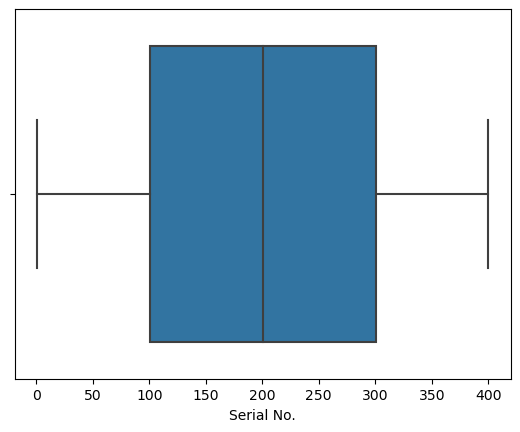

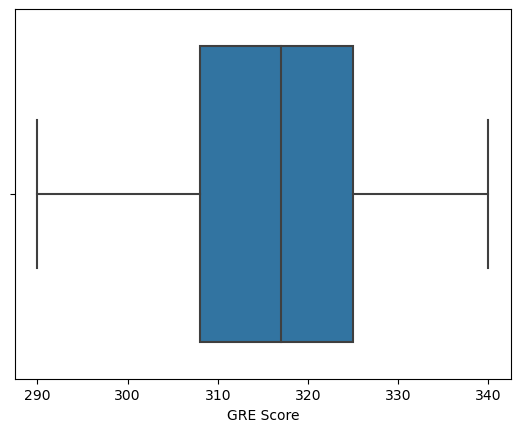

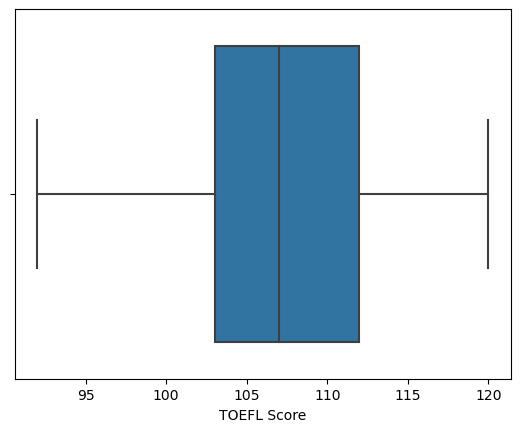

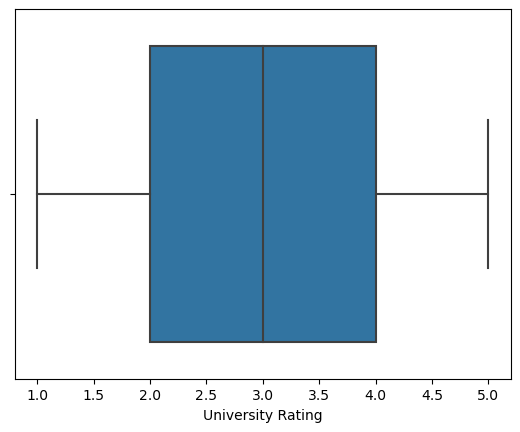

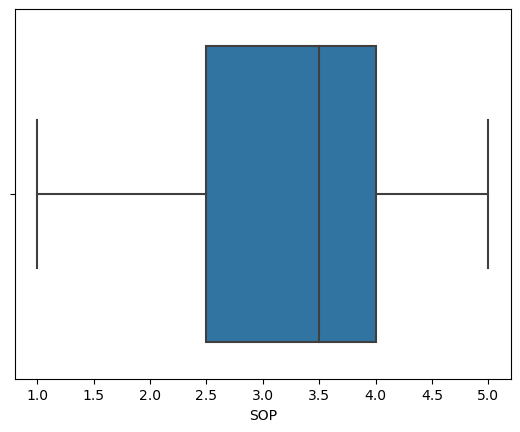

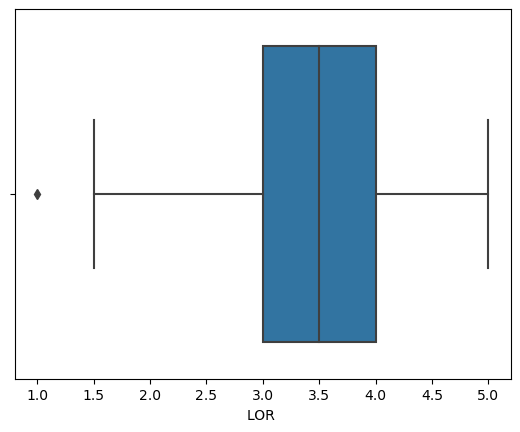

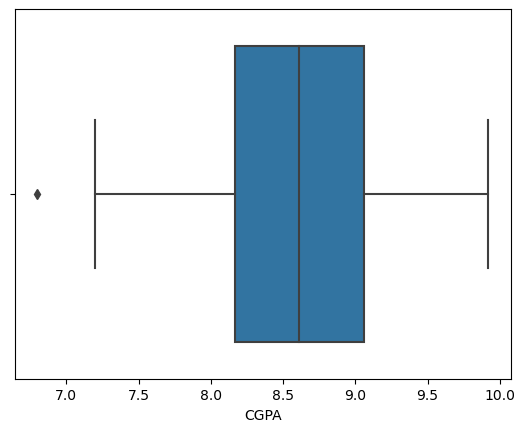

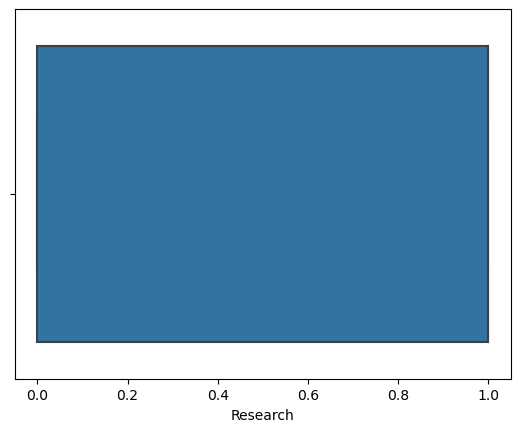

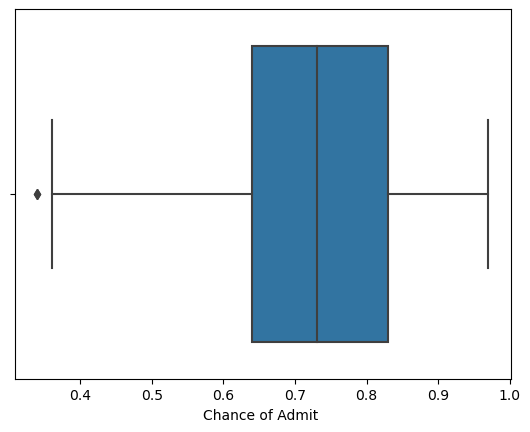

In [36]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

<AxesSubplot:>

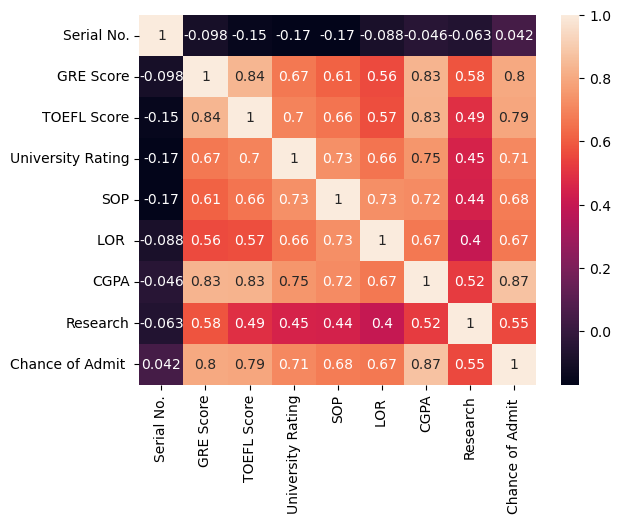

In [37]:
sns.heatmap(df.corr(), annot=True)

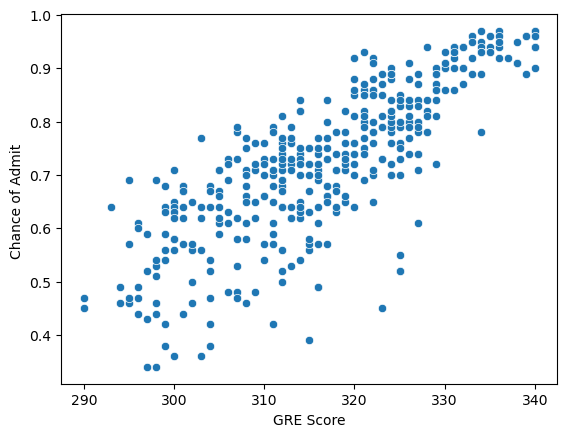

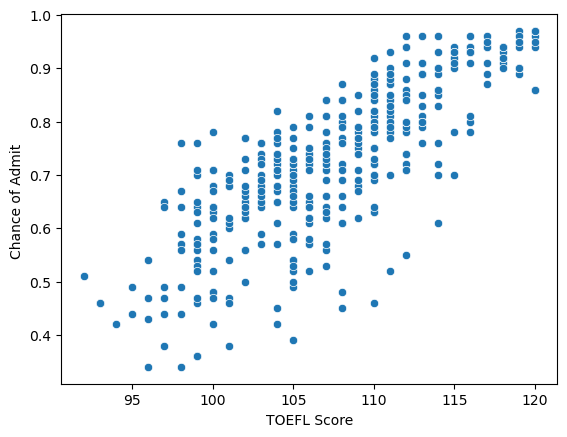

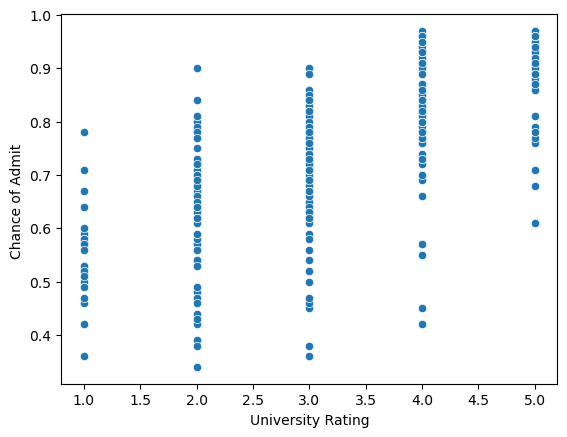

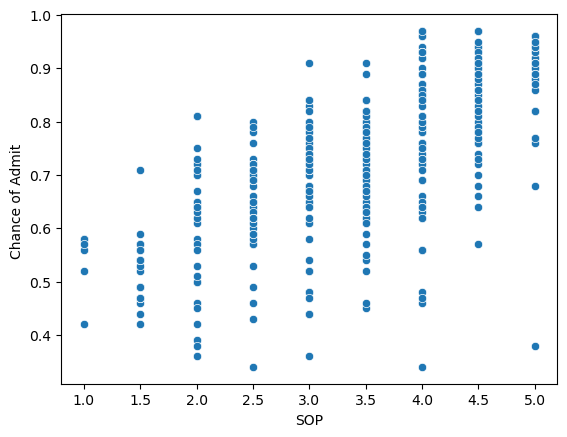

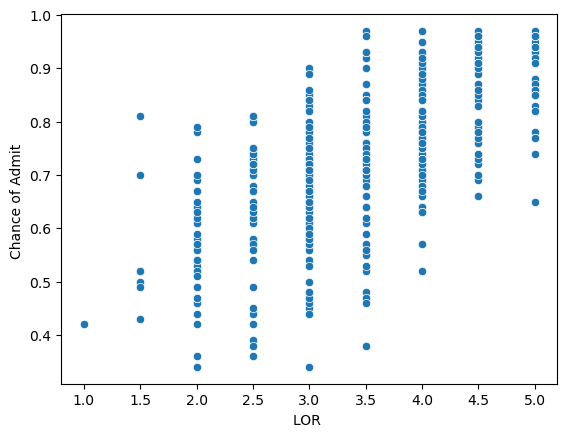

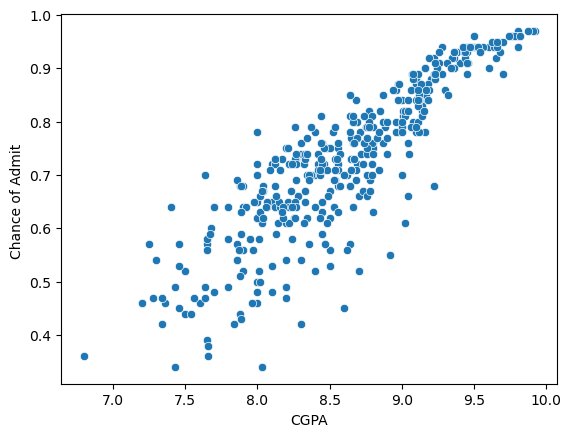

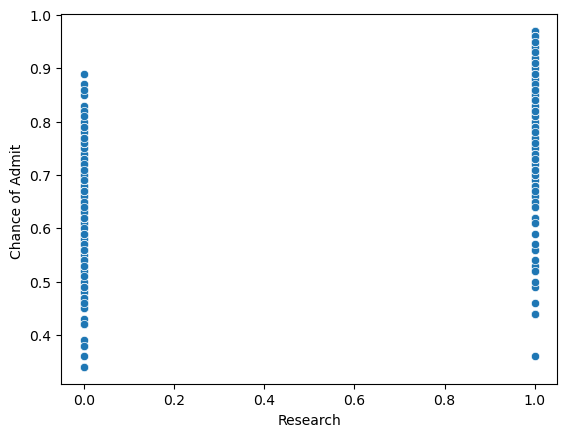

In [38]:
var_to_plot=[ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
target_col=['Chance of Admit ']

for col in var_to_plot:
    sns.scatterplot(df[col], df['Chance of Admit '])
    plt.show()

In [39]:
## importing sklearn libraries required for model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [41]:
target_var=['Chance of Admit ']
pred_var=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']
x= df[pred_var]
y=df[target_var]

In [42]:
# splitting into train ,test dataset
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320, 1), (80, 1))

In [43]:
# creating object of StandardScaler
sc= StandardScaler()
sc.fit(x_train)
x_train_transform=sc.transform(x_train)

# creating object of LinearRegression
model=LinearRegression()
model.fit(x_train_transform, y_train)

## calculating score
model.score(x_train_transform, y_train)

0.7920128948045824

In [44]:
x_test_transform=sc.transform(x_test)
model.score(x_test_transform, y_test)

0.8377307639716103

## Conclusion: 
From train and test score we can see there is not significant difference in the accuracy, hence model is quite good, we can further try to implement this problem with other ML algorithmn